In [48]:
import pandas as pd
from tqdm import tqdm

In [49]:
import os
print(os.getcwd())

e:\GitHub\Customer_Segmentation


In [50]:
file_path = 'data.csv'
if os.path.isfile(file_path):
    print(f"{file_path} exists.")
else:
    print(f"{file_path} does not exist.")

data.csv exists.


In [51]:
df = pd.read_csv('data.csv', encoding='latin1')


In [52]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [53]:
df_cleaned = df.dropna()
df_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [54]:
df_cleaned = df_cleaned.drop_duplicates()
df_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [55]:
df_cleaned.to_csv('data_cleaned.csv', index=False)

In [56]:
df_cleaned = df_cleaned[~((df_cleaned['InvoiceNo'].str.startswith('C')) & (df_cleaned['Quantity'] < 0))]

In [57]:
df_product = pd.DataFrame(df_cleaned['Description'].unique()).rename(columns = {0:'Description'})

In [58]:
import pandas as pd
import spacy

# Load spacy model
nlp = spacy.load("en_core_web_sm")

def keywords_inventory(dataframe, colonne='Description'):
    keywords_roots = dict()  # collect the words / root
    keywords_select = dict()  # association: root <-> keyword
    category_keys = []
    count_keywords = dict()
    
    for s in dataframe[colonne]:
        if pd.isnull(s): continue
        
        # Process text using spacy
        doc = nlp(s.lower())
        
        # Extract nouns and their lemma
        nouns = [token for token in doc if token.pos_ in ('NOUN', 'PROPN')]
        
        for token in nouns:
            root = token.lemma_.lower()  # Get the lemma (root) of the noun
            word = token.text.lower()
            
            if root in keywords_roots:                
                keywords_roots[root].add(word)
                count_keywords[root] += 1                
            else:
                keywords_roots[root] = {word}
                count_keywords[root] = 1
    
    # Select the shortest word as the keyword for each root
    for root in keywords_roots.keys():
        if len(keywords_roots[root]) > 1:
            shortest_word = min(keywords_roots[root], key=len)
            category_keys.append(shortest_word)
            keywords_select[root] = shortest_word
        else:
            single_word = __builtins__.list(keywords_roots[root])[0]
            category_keys.append(single_word)
            keywords_select[root] = single_word
    
    print(f"Nb of keywords in variable '{colonne}': {len(category_keys)}")
    
    return category_keys, keywords_roots, keywords_select, count_keywords


In [59]:
keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(df_product)

Nb of keywords in variable 'Description': 1528


In [60]:
list_products = []
for k,v in count_keywords.items():
    list_products.append([keywords_select[k],v])
list_products.sort(key = lambda x:x[1], reverse = True)

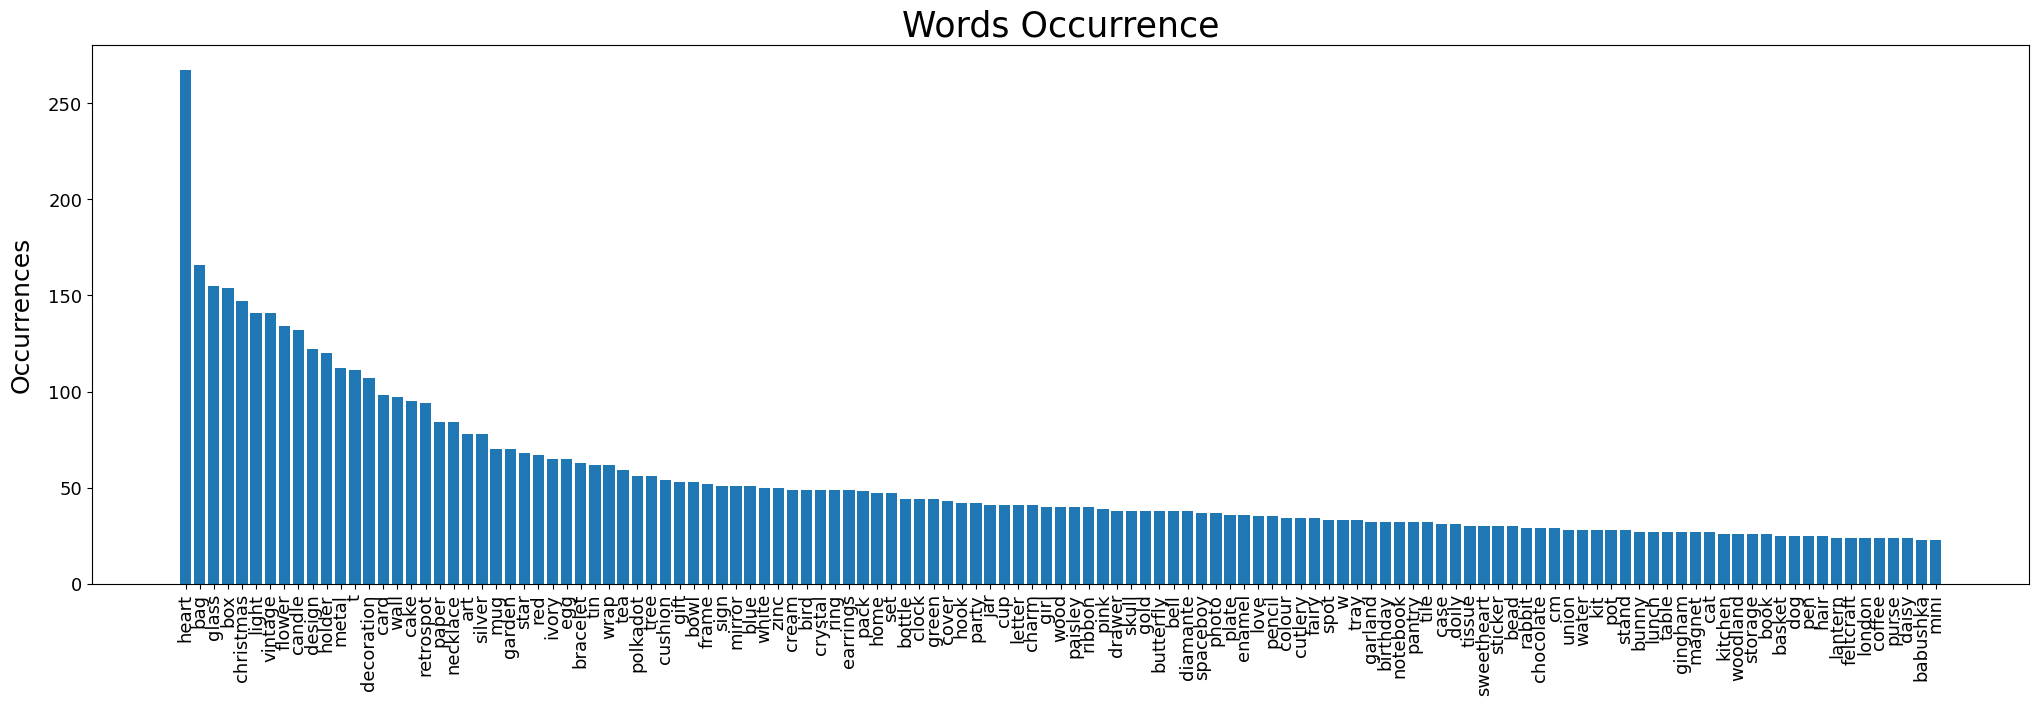

In [61]:
import matplotlib.pyplot as plt

# Sorting the products list by occurrences in reverse order
list_ = sorted(list_products, key=lambda x: x[1], reverse=True)

# Create the figure and axis, with a wider figure for better horizontal view
fig, ax = plt.subplots(figsize=(25, 7))  # Wider and shorter figure

# Extracting the values for the y-axis (occurrences) and x-axis (words)
y_axis = [i[1] for i in list_[:125]]  # Occurrences
x_axis = [k for k, i in enumerate(list_[:125])]  # Word index for plotting
x_label = [i[0] for i in list_[:125]]  # Word labels

# Set font size for x and y ticks
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Adjust the x-axis to show word labels and occurrences
plt.xticks(x_axis, x_label, rotation=90)  # Rotate labels for horizontal clarity

# Plotting a horizontal bar chart
ax.bar(x_axis, y_axis, align='center')

# Label for y-axis and inverting the order for readability
plt.ylabel("Occurrences", fontsize=18, labelpad=10)

# Set title for the plot without black box
plt.title("Words Occurrence", color='black', fontsize=25)

# Show the plot
plt.show()



In [62]:
list_products = []
for k,v in count_keywords.items():
    word = keywords_select[k]
    if word in ['pink', 'blue', 'tag', 'green', 'orange']: continue
    if len(word) < 3 or v < 13: continue
    if ('+' in word) or ('/' in word): continue
    list_products.append([word, v])
#______________________________________________________    
list_products.sort(key = lambda x:x[1], reverse = True)
print('removed words: ', len(list_products))

removed words:  200


In [63]:
list_produits = df_cleaned['Description'].unique()
X = pd.DataFrame()
for key, occurence in list_products:
    X.loc[:, key] = __builtins__.list(map(lambda x:int(key.upper() in x), list_produits))

C:\Users\ryuos\AppData\Local\Temp\ipykernel_21400\663119411.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X.loc[:, key] = __builtins__.list(map(lambda x:int(key.upper() in x), list_produits))
C:\Users\ryuos\AppData\Local\Temp\ipykernel_21400\663119411.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X.loc[:, key] = __builtins__.list(map(lambda x:int(key.upper() in x), list_produits))
C:\Users\ryuos\AppData\Local\Temp\ipykernel_21400\663119411.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the

In [64]:

threshold = [0, 1, 2, 3, 5, 10]
label_col = []
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])
    label_col.append(col)
    X.loc[:, col] = 0

for i, prod in tqdm(enumerate(list_produits)):
    prix = df_cleaned[ df_cleaned['Description'] == prod]['UnitPrice'].mean()
    j = 0
    while prix > threshold[j]:
        j+=1
        if j == len(threshold): break
    X.loc[i, label_col[j-1]] = 1

C:\Users\ryuos\AppData\Local\Temp\ipykernel_21400\3568614683.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X.loc[:, col] = 0
C:\Users\ryuos\AppData\Local\Temp\ipykernel_21400\3568614683.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X.loc[:, col] = 0
C:\Users\ryuos\AppData\Local\Temp\ipykernel_21400\3568614683.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=

In [114]:
print("{:<8} {:<20} \n".format('gamme', 'nb. produits') + 20*'-')
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])    
    print("{:<10}  {:<20}".format(col, X.loc[:, col].sum()))

gamme    nb. produits         
--------------------
0<.<1       964                 
1<.<2       1009                
2<.<3       673                 
3<.<5       606                 
5<.<10      470                 
.>10        155                 


In [115]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA

In [116]:
matrix = X.to_numpy()
for n_clusters in range(3,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
n_clusters = 5
silhouette_avg = -1
while silhouette_avg < 0.143:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    
    #km = kmodes.KModes(n_clusters = n_clusters, init='Huang', n_init=2, verbose=0)
    #clusters = km.fit_predict(matrix)
    #silhouette_avg = silhouette_score(matrix, clusters)
print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 5 The average silhouette_score is : 0.14309670726311088


In [117]:
df_cleaned['TotalPrice'] = df_cleaned['UnitPrice'] * (df_cleaned['Quantity'])

C:\Users\ryuos\AppData\Local\Temp\ipykernel_21400\1764207960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['TotalPrice'] = df_cleaned['UnitPrice'] * (df_cleaned['Quantity'])


In [118]:
corresp = dict()
for key, val in zip (list_produits, clusters):
    corresp[key] = val 
#__________________________________________________________________________
df_cleaned['categ_product'] = df_cleaned.loc[:, 'Description'].map(corresp)

C:\Users\ryuos\AppData\Local\Temp\ipykernel_21400\3980572534.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['categ_product'] = df_cleaned.loc[:, 'Description'].map(corresp)


In [119]:
for i in range(5):
    col = 'categ_{}'.format(i)        
    df_temp = df_cleaned[df_cleaned['categ_product'] == i]
    price_temp = df_temp['UnitPrice'] * df_temp['Quantity']
    price_temp = price_temp.apply(lambda x:x if x > 0 else 0)
    df_cleaned.loc[:, col] = price_temp
    df_cleaned[col].fillna(0, inplace = True)
#__________________________________________________________________________________________________
df_cleaned[['InvoiceNo', 'Description', 'categ_product', 'categ_0', 'categ_1', 'categ_2', 'categ_3','categ_4']][:5]

C:\Users\ryuos\AppData\Local\Temp\ipykernel_21400\381166065.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, col] = price_temp
C:\Users\ryuos\AppData\Local\Temp\ipykernel_21400\381166065.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col].fillna(0, inplace = True)


,InvoiceNo,Description,categ_product,categ_0,categ_1,categ_2,categ_3,categ_4
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,0,15.3,0.00,0.0,0.0,0.0
1,536365,WHITE METAL LANTERN,1,0.0,20.34,0.0,0.0,0.0
2,536365,CREAM CUPID HEARTS COAT HANGER,1,0.0,22.00,0.0,0.0,0.0
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,1,0.0,20.34,0.0,0.0,0.0
4,536365,RED WOOLLY HOTTIE WHITE HEART.,1,0.0,20.34,0.0,0.0,0.0


In [120]:
df_cleaned[['InvoiceNo', 'Description', 'categ_product', 'categ_0', 'categ_1', 'categ_2', 'categ_3','categ_4']]

,InvoiceNo,Description,categ_product,categ_0,categ_1,categ_2,categ_3,categ_4
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,0,15.3,0.00,0.0,0.0,0.0
1,536365,WHITE METAL LANTERN,1,0.0,20.34,0.0,0.0,0.0
2,536365,CREAM CUPID HEARTS COAT HANGER,1,0.0,22.00,0.0,0.0,0.0
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,1,0.0,20.34,0.0,0.0,0.0
4,536365,RED WOOLLY HOTTIE WHITE HEART.,1,0.0,20.34,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
541904,581587,PACK OF 20 SPACEBOY NAPKINS,3,0.0,0.00,0.0,10.2,0.0
541905,581587,CHILDREN'S APRON DOLLY GIRL,0,12.6,0.00,0.0,0.0,0.0
541906,581587,CHILDRENS CUTLERY DOLLY GIRL,1,0.0,16.60,0.0,0.0,0.0
541907,581587,CHILDRENS CUTLERY CIRCUS PARADE,1,0.0,16.60,0.0,0.0,0.0


In [121]:
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['TotalPrice'].sum()
basket_price = temp.rename(columns = {'TotalPrice':'Basket Price'})

In [122]:
for i in range(5):
    col = 'categ_{}'.format(i) 
    temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)[col].sum()
    basket_price.loc[:, col] = temp[col]
    

In [124]:
df_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,categ_product,categ_0,categ_1,categ_2,categ_3,categ_4,InvoiceDate_int
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,0,15.3,0.00,0.0,0.0,0.0,2010-12-01 08:26:00.000000
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,0.0,20.34,0.0,0.0,0.0,2010-12-01 08:26:00.000000
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,1,0.0,22.00,0.0,0.0,0.0,2010-12-01 08:26:00.000000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,0.0,20.34,0.0,0.0,0.0,2010-12-01 08:26:00.000000
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,0.0,20.34,0.0,0.0,0.0,2010-12-01 08:26:00.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,3,0.0,0.00,0.0,10.2,0.0,2011-12-09 12:50:00.000000
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0,12.6,0.00,0.0,0.0,0.0,2011-12-09 12:50:00.000000
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,1,0.0,16.60,0.0,0.0,0.0,2011-12-09 12:50:00.000000
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,1,0.0,16.60,0.0,0.0,0.0,2011-12-09 12:50:00.000000


In [141]:
df_cleaned['InvoiceDate_int'] = pd.Series(df_cleaned['InvoiceDate']).astype('int64')

df_cleaned

C:\Users\ryuos\AppData\Local\Temp\ipykernel_21400\3617876597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['InvoiceDate_int'] = pd.Series(df_cleaned['InvoiceDate']).astype('int64')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,categ_product,categ_0,categ_1,categ_2,categ_3,categ_4,InvoiceDate_int
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,0,15.3,0.00,0.0,0.0,0.0,1291191960000000000
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,0.0,20.34,0.0,0.0,0.0,1291191960000000000
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,1,0.0,22.00,0.0,0.0,0.0,1291191960000000000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,0.0,20.34,0.0,0.0,0.0,1291191960000000000
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,0.0,20.34,0.0,0.0,0.0,1291191960000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,3,0.0,0.00,0.0,10.2,0.0,1323435000000000000
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0,12.6,0.00,0.0,0.0,0.0,1323435000000000000
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,1,0.0,16.60,0.0,0.0,0.0,1323435000000000000
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,1,0.0,16.60,0.0,0.0,0.0,1323435000000000000


In [182]:
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate_int'].mean()

In [183]:
basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])

C:\Users\ryuos\AppData\Local\Temp\ipykernel_21400\1789062281.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])


In [184]:
basket_price

,CustomerID,InvoiceNo,Basket Price,categ_0,categ_1,categ_2,categ_3,categ_4,InvoiceDate
0,12346.0,541431,77183.60,0.00,0.00,77183.60,0.00,0.00,2011-01-18 10:01:00.000000000
1,12347.0,537626,711.79,83.40,293.35,187.20,23.40,124.44,2010-12-07 14:57:00.000000000
2,12347.0,542237,475.39,53.10,169.20,130.50,84.34,38.25,2011-01-26 14:29:59.999999744
3,12347.0,549222,636.25,71.10,115.00,330.90,81.00,38.25,2011-04-07 10:43:00.000000000
4,12347.0,556201,382.52,78.06,168.76,74.40,41.40,19.90,2011-06-09 13:01:00.000000000
...,...,...,...,...,...,...,...,...,...
18531,18283.0,579673,220.31,106.21,9.75,74.70,29.65,0.00,2011-11-30 12:59:00.000000000
18532,18283.0,580872,208.00,119.03,0.00,61.90,27.07,0.00,2011-12-06 12:02:00.000000000
18533,18287.0,554065,765.28,134.70,15.00,540.90,40.68,34.00,2011-05-22 10:39:00.000000000
18534,18287.0,570715,1001.32,326.04,32.00,386.44,256.84,0.00,2011-10-12 10:23:00.000000000


In [213]:
import datetime
comparison_date = pd.Timestamp(datetime.date(2011, 10, 1))

# Now perform the comparisons
train_set = basket_price[basket_price['InvoiceDate'] < comparison_date]
test_set = basket_price[basket_price['InvoiceDate'] >= comparison_date]

In [214]:
transactions_per_user=basket_price.groupby(by=['CustomerID'])['Basket Price'].agg(['count','min','max','mean','sum'])
for i in range(5):
    col = 'categ_{}'.format(i)
    transactions_per_user.loc[:,col] = basket_price.groupby(by=['CustomerID'])[col].sum() /\
                                            transactions_per_user['sum']*100

transactions_per_user.reset_index(drop = False, inplace = True)
basket_price.groupby(by=['CustomerID'])['categ_0'].sum()
transactions_per_user.sort_values('CustomerID', ascending = True)[:5]

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4
0,12346.0,1,77183.60,77183.60,77183.600000,77183.60,0.000000,0.000000,100.000000,0.000000,0.000000
1,12347.0,7,224.82,1294.32,615.714286,4310.00,20.805104,29.540371,26.375870,11.237123,12.041531
2,12348.0,4,227.44,892.80,449.310000,1797.24,0.000000,0.000000,41.953217,38.016069,20.030714
3,12349.0,1,1757.55,1757.55,1757.550000,1757.55,12.245455,10.713778,26.506216,4.513101,46.021450
4,12350.0,1,334.40,334.40,334.400000,334.40,27.900718,0.000000,48.444976,11.692584,11.961722


In [215]:
last_date = basket_price['InvoiceDate'].max().date()

first_registration = pd.DataFrame(basket_price.groupby(by=['CustomerID'])['InvoiceDate'].min())
last_purchase      = pd.DataFrame(basket_price.groupby(by=['CustomerID'])['InvoiceDate'].max())

test  = first_registration.applymap(lambda x:(last_date - x.date()).days)
test2 = last_purchase.applymap(lambda x:(last_date - x.date()).days)

transactions_per_user.loc[:, 'LastPurchase'] = test2.reset_index(drop = False)['InvoiceDate']
transactions_per_user.loc[:, 'FirstPurchase'] = test.reset_index(drop = False)['InvoiceDate']

transactions_per_user[:5]

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,LastPurchase,FirstPurchase
0,12346.0,1,77183.60,77183.60,77183.600000,77183.60,0.000000,0.000000,100.000000,0.000000,0.000000,325,325
1,12347.0,7,224.82,1294.32,615.714286,4310.00,20.805104,29.540371,26.375870,11.237123,12.041531,2,367
2,12348.0,4,227.44,892.80,449.310000,1797.24,0.000000,0.000000,41.953217,38.016069,20.030714,75,358
3,12349.0,1,1757.55,1757.55,1757.550000,1757.55,12.245455,10.713778,26.506216,4.513101,46.021450,18,18
4,12350.0,1,334.40,334.40,334.400000,334.40,27.900718,0.000000,48.444976,11.692584,11.961722,310,310


In [216]:
list_cols = ['count','min','max','mean','categ_0','categ_1','categ_2','categ_3','categ_4']
#_____________________________________________________________
selected_customers = transactions_per_user.copy(deep = True)
matrix = selected_customers[list_cols].to_numpy()

In [217]:
scaler = StandardScaler()
scaler.fit(matrix)
print('variables mean values: \n' + 90*'-' + '\n' , scaler.mean_)
scaled_matrix = scaler.transform(matrix)

variables mean values: 
------------------------------------------------------------------------------------------
 [  4.27195206 262.27638673 653.4976059  417.52750093  21.53795868
  16.97646523  25.2152717   14.01497363  22.25533076]


In [218]:
import numpy as np
from sklearn.decomposition import PCA

# Remove rows containing NaN values
valid_indices = ~np.isnan(scaled_matrix).any(axis=1) 
scaled_matrix = scaled_matrix[valid_indices]  # Filter the scaled_matrix
selected_customers = selected_customers[valid_indices]  # Filter the selected_customers to match

pca = PCA()
pca.fit(scaled_matrix)
pca_samples = pca.transform(scaled_matrix)

In [219]:
n_clusters = 10
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
kmeans.fit(scaled_matrix)
clusters_clients = kmeans.predict(scaled_matrix)
silhouette_avg = silhouette_score(scaled_matrix, clusters_clients)
print('score de silhouette: {:<.3f}'.format(silhouette_avg))

score de silhouette: 0.247


In [220]:
pd.DataFrame(pd.Series(clusters_clients).value_counts(), columns = ['Number of Clients']).T

,5,8,1,7,6,3,0,9,2,4
Number of Clients,2002,607,573,364,328,313,142,7,1,1


In [221]:
pca = PCA(n_components=6)
matrix_3D = pca.fit_transform(scaled_matrix)
mat = pd.DataFrame(matrix_3D)
mat['cluster'] = pd.Series(clusters_clients)

In [224]:
selected_customers.loc[:, 'cluster'] = clusters_clients

In [225]:
merged_df = pd.DataFrame()
for i in range(n_clusters):
    test = pd.DataFrame(selected_customers[selected_customers['cluster'] == i].mean())
    test = test.T.set_index('cluster', drop = True)
    test['size'] = selected_customers[selected_customers['cluster'] == i].shape[0]
    merged_df = pd.concat([merged_df, test])
#_____________________________________________________
merged_df.drop('CustomerID', axis = 1, inplace = True)
print('number of customers:', merged_df['size'].sum())

merged_df = merged_df.sort_values('sum')

number of customers: 4338


In [226]:
liste_index = []
for i in range(5):
    column = 'categ_{}'.format(i)
    liste_index.append(merged_df[merged_df[column] > 45].index.values[0])
#___________________________________
liste_index_reordered = liste_index
liste_index_reordered += [ s for s in merged_df.index if s not in liste_index]
#___________________________________________________________
merged_df = merged_df.reindex(index = liste_index_reordered)
merged_df = merged_df.reset_index(drop = False)
display(merged_df[['cluster', 'count', 'min', 'max', 'mean', 'sum', 'categ_0',
                   'categ_1', 'categ_2', 'categ_3', 'categ_4', 'size']])

,cluster,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,size
0,3.0,2.952077,248.571725,461.509010,347.628433,1033.618243,63.623071,7.141167,13.648052,6.976559,8.611151,313
1,6.0,2.628049,249.402744,431.769207,330.290923,990.186738,13.165402,53.078947,13.476142,6.784617,13.494892,328
2,8.0,2.744646,234.686442,392.276985,307.006219,840.703708,14.384058,8.704563,54.818537,13.121136,8.971706,607
3,7.0,2.502747,217.111374,383.420879,286.783676,805.173132,12.479807,7.536053,20.931294,50.659179,8.393667,364
4,1.0,3.034904,261.640682,463.697487,348.620236,1091.303422,11.030264,11.327912,11.253569,4.769149,61.619106,573
5,5.0,3.902597,256.212518,586.571694,403.137693,1526.322264,22.783503,18.459546,24.901461,12.790658,21.064832,2002
6,0.0,26.161972,118.370775,3312.279859,935.032109,22175.350282,26.330607,17.076409,22.695580,10.903815,22.993590,142
7,9.0,128.857143,10.608571,2252.004286,390.172128,51420.727143,21.965765,14.325492,24.885454,13.643624,25.179665,7
8,2.0,1.000000,77183.600000,77183.600000,77183.600000,77183.600000,0.000000,0.000000,100.000000,0.000000,0.000000,1
9,4.0,2.000000,2.900000,168469.600000,84236.250000,168472.500000,99.998279,0.000000,0.001721,0.000000,0.000000,1


In [227]:
columns = ['mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4' ]
X = selected_customers[columns]
Y = selected_customers['cluster']

In [228]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, train_size = 0.8)

In [229]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [230]:
class Class_Fit(object):
    def __init__(self, clf, params=None):
        if params:            
            self.clf = clf(**params)
        else:
            self.clf = clf()

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def grid_search(self, parameters, Kfold):
        self.grid = GridSearchCV(estimator = self.clf, param_grid = parameters, cv = Kfold)
        
    def grid_fit(self, X, Y):
        self.grid.fit(X, Y)
        
    def grid_predict(self, X, Y):
        self.predictions = self.grid.predict(X)
        print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y, self.predictions)))

In [231]:
rf = Class_Fit(clf = ensemble.RandomForestClassifier)
param_grid = {'criterion' : ['entropy', 'gini'], 'n_estimators' : [20, 40, 60, 80, 100],
               'max_features' :['sqrt', 'log2']}
rf.grid_search(parameters = param_grid, Kfold = 5)
rf.grid_fit(X = X_train, Y = Y_train)
rf.grid_predict(X_test, Y_test)

c:\Users\ryuos\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Precision: 94.47 % 


c:\Users\ryuos\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


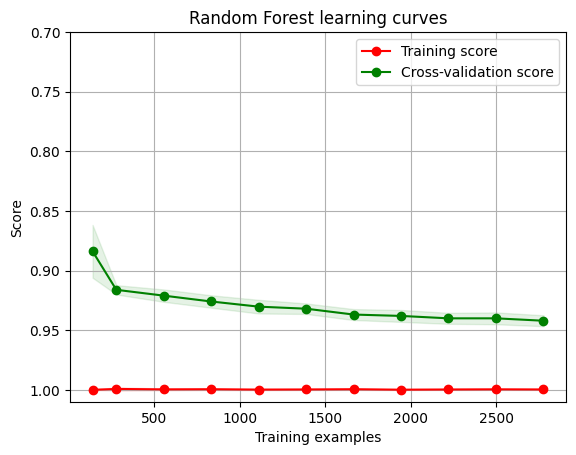

In [232]:
g = plot_learning_curve(rf.grid.best_estimator_, "Random Forest learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])